<img src="../fasp/runner/credits/images/FASPNotebook02.jpg" style="float: right;">

### BioDataCatalyst and CRDC Search-Locate-Compute
This script runs the same work as FASPScript2, adapted to use FASPRunner and a WES Client.

In [1]:
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.loc import DRSMetaResolver
from fasp.workflow import sbcgcWESClient
from fasp.search import DataConnectClient, BigQuerySearchClient

faspRunner = FASPRunner(program='FASPNotebook02')
runNote = 'CRDC and BioDataCatalyst via FASPRunner, GA4GH++'

### Step 1 - Discovery
Query for relevant sequence files and get theit DRD ids.

This example simply explores that we can query from different sources of subject/sample data and get files from two different cloud platforms.

In [2]:
# TCGA Query - CRDC
crdcquery = """
    SELECT 'case_'||associated_entities__case_gdc_id , 'crdc:'||file_id
    FROM collections.public_datasets.cshcodeathon_gdc_rel24_filedata_active 
    WHERE data_format = 'BAM' 
        AND project_disease_type = 'Breast Invasive Carcinoma'
    LIMIT 3
"""

#COPD query - BioDataCatalyst
bdcquery = """
    SELECT SUBJECT_ID, 'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.phenotype_drs`
    WHERE Weight_KG between 92.5 and 93.0
    LIMIT 3
"""

### Run FASPRunner against NCI Cancer Research Data Commons	
Configure FASPRunner with the three clients needed

In [3]:
searchClient = DataConnectClient('https://data.publisher.dnastack.com/data-connect/')

drsClient = DRSMetaResolver()

# Step 3 - set up a class that runs samtools for us
# providing the location for the results
settings = faspRunner.settings
wesClient = sbcgcWESClient(settings['SevenBridgesProject'])
faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(crdcquery, runNote)

Invalid access token in /Users/forei/.keys/anvil_credentials.json
Searching the GA4GH registry for org.ga4gh:drs services
Running query

    SELECT 'case_'||associated_entities__case_gdc_id , 'crdc:'||file_id
    FROM collections.public_datasets.cshcodeathon_gdc_rel24_filedata_active 
    where data_format = 'BAM' 
    and project_disease_type = 'Breast Invasive Carcinoma'
    limit 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
subject=case_1b703058-e596-45bc-80fe-8b98d545c2e2, drsID=crdc:030e5e74-6461-4f05-a399-de8e470bc056
workflow submitted, run:3b48bc69-ed82-4c4c-a555-4e0303512813
____________________________________________________________
subject=case_a947a945-4721-45cc-bc45-13b8ea41c10e, drsID=crdc:04c68898-ddac-4e15-9f9a-5bf278d55e4a
workflow submitted, run:cdd1a0d5-2ebc-439c-aded-e4845bbe61a1
____________________________________________________________
subject=case_c462e422-

### Run FASPRunner against BioDataCatalyst	
Reconfigure and run the FASPClient for the BioDataCatalyst data

In [4]:
searchClient = BigQuerySearchClient()
faspRunner.configure(searchClient, drsClient, wesClient)
runList = faspRunner.runQuery(bdcquery, runNote)

Running query

    SELECT SUBJECT_ID, 'bdc:'||read_drs_id
    FROM `isbcgc-216220.COPDGene.phenotype_drs`
    where Weight_KG between 92.5 and 93.0
    LIMIT 3
subject=COPDGene_G56621, drsID=bdc:dg.4503/763aacdc-ac73-4d0e-9e8e-7f115238a2e8
workflow submitted, run:b3abd4b3-2b2f-494d-8381-e7c24bf57dce
____________________________________________________________
subject=COPDGene_X62605, drsID=bdc:dg.4503/750ea953-bd9e-46e0-8434-df3f6db027de
workflow submitted, run:8149c411-7237-430f-9da9-d4d2cc2e66be
____________________________________________________________
subject=COPDGene_B98456, drsID=bdc:dg.4503/8896427d-7993-4c3f-8463-15a5b0b34ed3
workflow submitted, run:29d06287-1b10-46a4-af72-1d40552a25db
____________________________________________________________


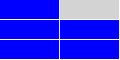

In [5]:
faspRunner.getFASPicon()